In [2]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import pickle
from langdetect import detect

In [3]:
with open("./listings.pkl", "rb") as fh:
    data = pickle.load(fh)

In [4]:
data

,Are Pets Allowed,Category Idx,Day of Advertisement Created,Day of Date Available From,Demand,Floor,Geo Canton,Geo City,Geo Zip,Has Balcony,...,Number of Images,Price Extra Normalized,Price Gross Normalized,Price M2 Normalized,Price Net Normalized,Property Reference Id,Size M2 Normalized,Subcategory En Idx,Year Built,Year Lastrenovated
0,NaN,APPT,"January 7, 2021","March 1, 2021",25.0,0.0,ZH,Dübendorf,8600,NaN,...,6,550.0,4460.0,19.0,3910.0,0002.03.7648,232.0,Apartment,2016.0,2016.0
1,NaN,APPT,"November 18, 2019","March 1, 2020",2.0,1.0,VD,Le Mont-sur-Lausanne,1052,NaN,...,7,120.0,1345.0,30.0,1225.0,9680.61.2071,45.0,Apartment,NaN,NaN
2,False,APPT,"March 15, 2017",NaN,0.0,1.0,BE,Langenthal,4900,False,...,13,250.0,1570.0,15.0,1320.0,7204.61.8658,103.0,Apartment,NaN,NaN
3,True,APPT,"July 7, 2021","May 1, 2021",4.0,1.0,AG,Fislisbach,5442,NaN,...,13,270.0,1480.0,17.0,1210.0,7410.50.5987,86.0,Apartment,1985.0,1985.0
4,False,APPT,"November 3, 2017","August 1, 2017",3.0,0.0,FR,Bulle,1630,False,...,3,300.0,1490.0,19.0,1190.0,9270.61.7822,79.0,Apartment,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,APPT,"January 4, 2018","April 1, 2018",2.0,2.0,SG,St. Gallen,9000,False,...,6,170.0,1350.0,15.0,1180.0,4458.50.0065,90.0,Apartment,NaN,NaN
19996,True,APPT,"November 3, 2021","February 1, 2022",1.0,2.0,VD,Vevey,1800,NaN,...,8,190.0,1940.0,23.0,1750.0,4481.61.5904,84.0,Apartment,1968.0,1968.0
19997,NaN,APPT,"October 15, 2021","June 16, 2021",2.0,5.0,GE,Grand-Lancy,1212,NaN,...,5,275.0,2175.0,32.0,1900.0,0221.61.7685,68.0,Apartment,NaN,NaN
19998,NaN,APPT,"October 1, 2020","May 1, 2021",2.0,7.0,VD,Nyon,1260,NaN,...,6,240.0,3540.0,37.0,3300.0,8508.50.4399,95.0,Apartment,NaN,NaN


In [5]:
list(data)

['Are Pets Allowed',
 'Category Idx',
 'Day of Advertisement Created',
 'Day of Date Available From',
 'Demand',
 'Floor',
 'Geo Canton',
 'Geo City',
 'Geo Zip',
 'Has Balcony',
 'Has Cabletv',
 'Has Elevator',
 'Has Fireplace',
 'Has Garage',
 'Has Parking',
 'Is New Construction',
 'Is New Construction Potential',
 'Is Tenant2Tenant',
 'Is Wheelchairaccessible',
 'Listing Description',
 'Listing Title',
 'Livingspace',
 'Number Of Rooms',
 'Number Of Rooms Cleaned',
 'Number of Documents',
 'Number of Images',
 'Price Extra Normalized',
 'Price Gross Normalized',
 'Price M2 Normalized',
 'Price Net Normalized',
 'Property Reference Id',
 'Size M2 Normalized',
 'Subcategory En Idx',
 'Year Built',
 'Year Lastrenovated']

In [6]:
def detect2(x):
    try:
        return detect(x)
    except:
        return None

In [7]:
data['Description Langage']=data['Listing Description'].apply(lambda x:detect2(x))

In [8]:
data['Title Langage']=data['Listing Title'].apply(lambda x:detect2(x))

In [9]:
data['Description Langage'].value_counts()

de    16330
fr     3189
it      423
Name: Description Langage, dtype: int64

In [10]:
data['Title Langage'].value_counts()

de    16169
fr     2825
it      242
pt      194
en      157
nl       82
af       79
es       47
da       30
ca       22
no       20
sv       19
tl       19
vi       16
hu       15
tr       15
hr       10
et        9
id        6
lt        5
fi        5
ro        5
so        4
cy        2
sq        1
pl        1
sl        1
Name: Title Langage, dtype: int64

In [11]:
data.count()

Are Pets Allowed                 10733
Category Idx                     20000
Day of Advertisement Created     20000
Day of Date Available From       16445
Demand                           20000
Floor                            19993
Geo Canton                       20000
Geo City                         20000
Geo Zip                          20000
Has Balcony                       7890
Has Cabletv                      12849
Has Elevator                     12415
Has Fireplace                     7821
Has Garage                       11719
Has Parking                      10791
Is New Construction               8942
Is New Construction Potential    20000
Is Tenant2Tenant                 20000
Is Wheelchairaccessible           7708
Listing Description              19954
Listing Title                    20000
Livingspace                      19981
Number Of Rooms                  20000
Number Of Rooms Cleaned          20000
Number of Documents              20000
Number of Images         

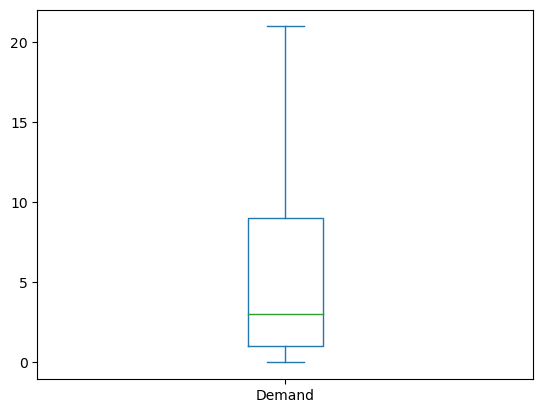

In [12]:
data['Demand'].plot.box(showfliers=False)
plt.show()

In [13]:
data['Demand'].value_counts()[0:10]

0.0     4476
1.0     2644
2.0     2057
3.0     1539
4.0     1190
5.0      922
6.0      726
7.0      647
8.0      547
9.0      479
10.0     400
Name: Demand, dtype: int64

<Figure size 1000x600 with 0 Axes>

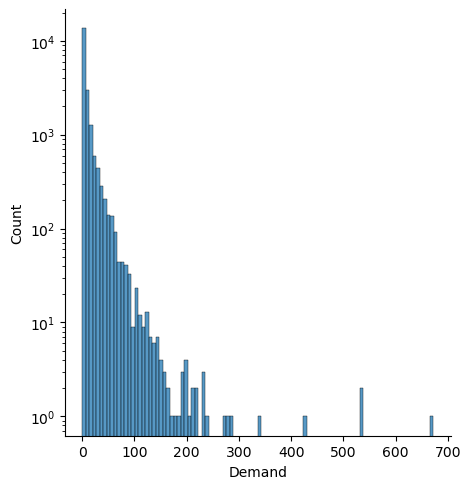

In [14]:
#Plot the distribution of Demand
plt.figure(figsize=(10, 6))
sns.displot(data['Demand'],bins=100)
plt.yscale('log')
plt.show()

<AxesSubplot:>

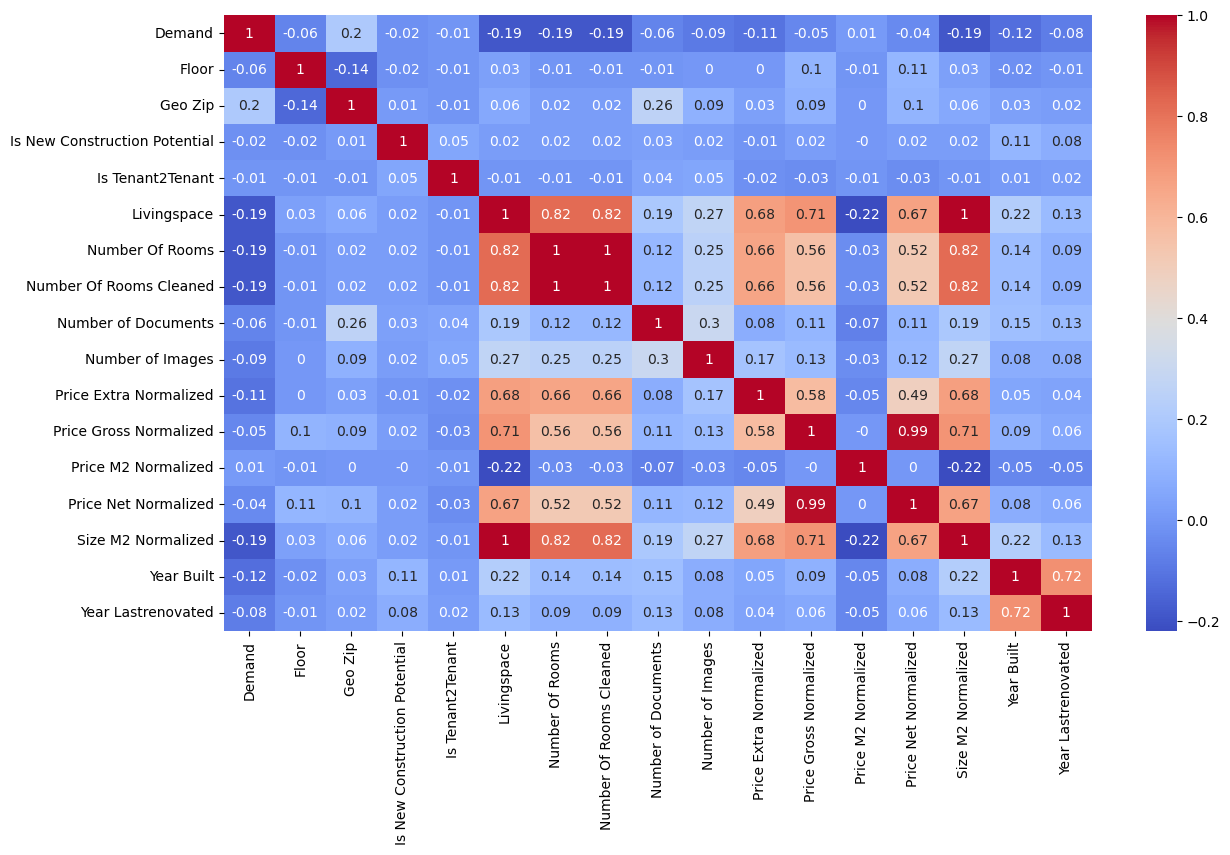

In [15]:
# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
corr_matrix = data.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)

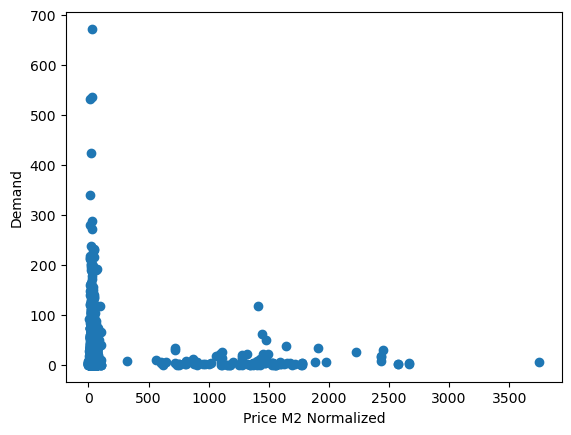

In [16]:
plt.scatter(data['Price M2 Normalized'],data['Demand'])
plt.xlabel('Price M2 Normalized')
plt.ylabel('Demand')
plt.show()